temperature: 32.11
gas: 31635.0
humidity: 28.0
barometer: 1003.98
Timestamp: 12-06 15:20:39
temperature: 32.11
gas: 31851.0
humidity: 28.0
barometer: 1004.01
Timestamp: 12-06 15:20:44
temperature: 32.12
gas: 31779.0
humidity: 28.0
barometer: 1004.02
Timestamp: 12-06 15:20:51
temperature: 32.13
gas: 32046.0
humidity: 28.0
barometer: 1003.98
Timestamp: 12-06 15:20:54
temperature: 32.13
gas: 32393.0
humidity: 28.0
barometer: 1004.02
Timestamp: 12-06 15:21:01
temperature: 32.13
gas: 32218.0
humidity: 27.0
barometer: 1004.01
Timestamp: 12-06 15:21:05
temperature: 32.14
gas: 32368.0
humidity: 27.0
barometer: 1003.97
Timestamp: 12-06 15:21:10
temperature: 32.15
gas: 31924.0
humidity: 28.0
barometer: 1003.98
Timestamp: 12-06 15:21:15
temperature: 32.16
gas: 32046.0
humidity: 28.0
barometer: 1003.98
Timestamp: 12-06 15:21:20
temperature: 32.15
gas: 32443.0
humidity: 27.0
barometer: 1003.98
Timestamp: 12-06 15:21:25
        timestamp  temperature      gas  humidity  barometer         place
0  12

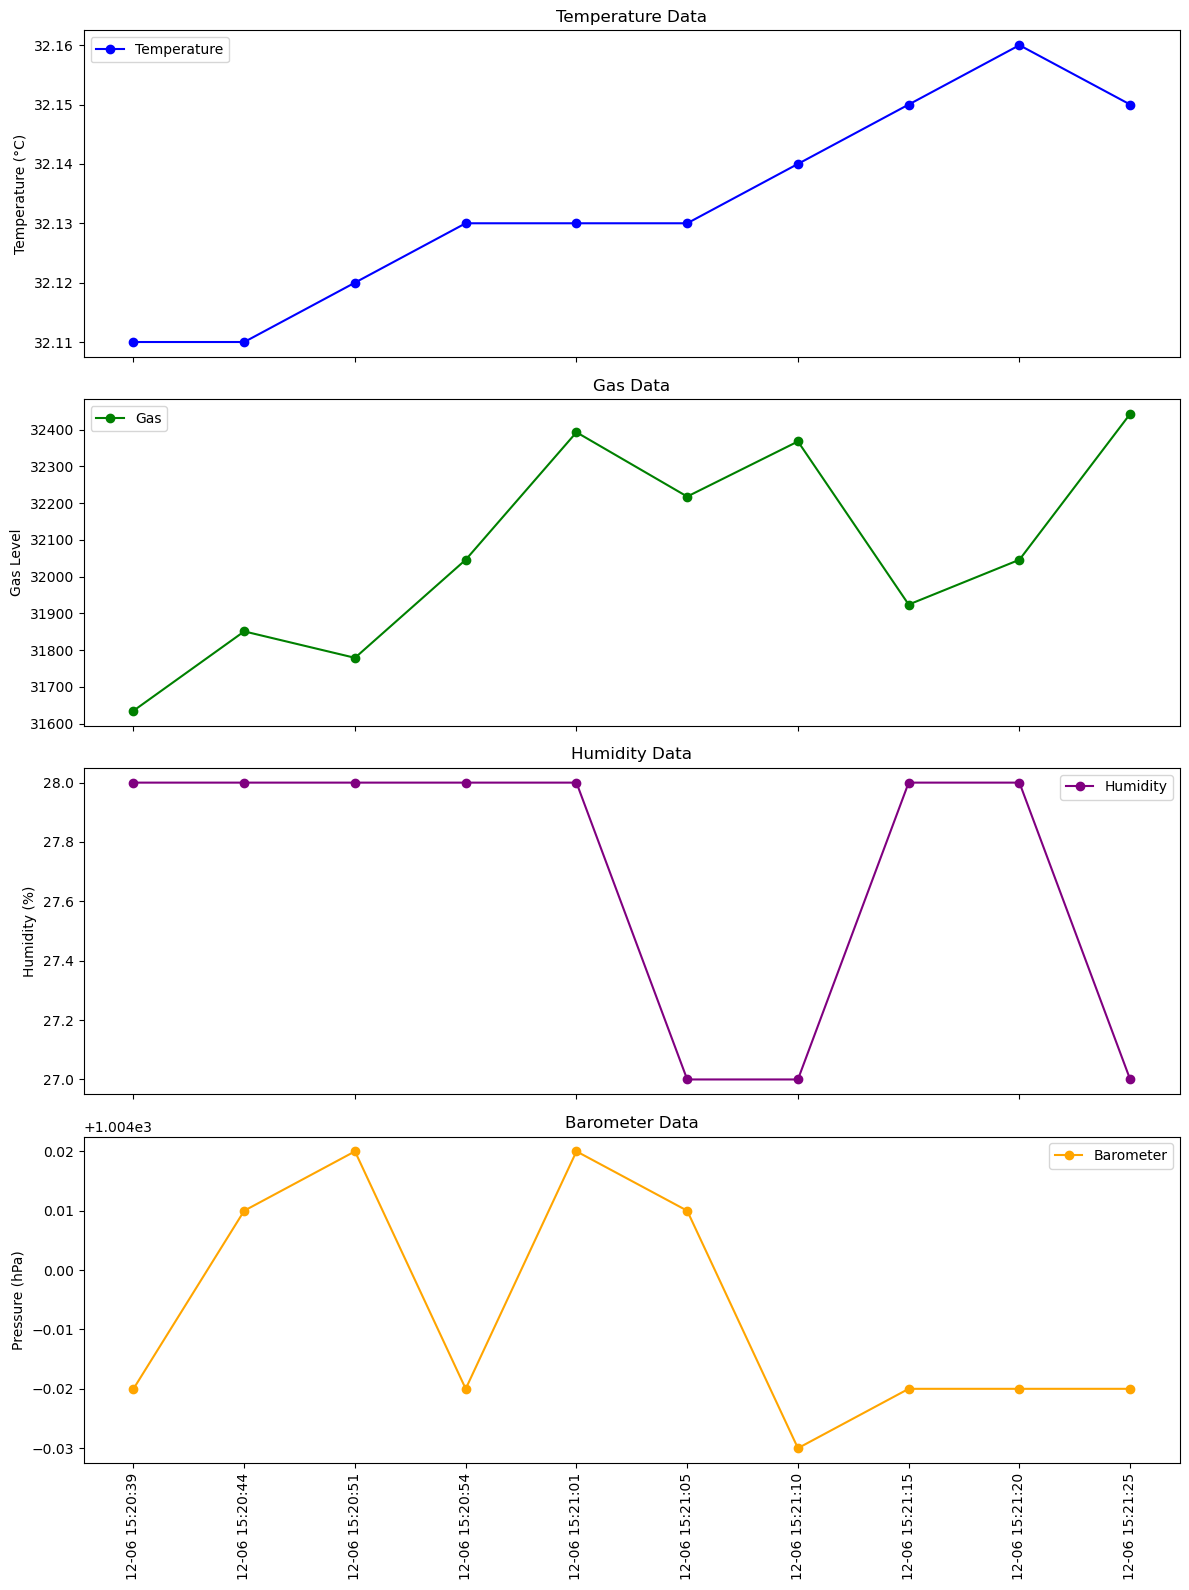

In [30]:
import paho.mqtt.subscribe as subscribe
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime  # use to record the exact time
import time
# import requests  # 用于网络请求

dongyangtopics = ['dongyang_temp', 'dongyang_gas','dongyang_humidity','dongyang_barometer']

# set the counting times
counts = 10
temperature = []
gas = []
times = []
humidity=[]
barometer=[]
# liverpool_temperature = []  # 利物浦温度

# # 利物浦温度数据的 API 信息
# API_KEY = '22a18c6ef80c9dd24ea87b6490b91603'  # 请替换为你的 OpenWeatherMap API 密钥
# CITY = 'Liverpool,GB'
# WEATHER_URL = f"http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric"

# def get_liverpool_temperature():
#     """从 OpenWeatherMap API 获取利物浦的实时温度"""
#     try:
#         response = requests.get(WEATHER_URL)
#         data = response.json()
#         if response.status_code == 200 and 'main' in data:
#             return data['main']['temp']  # 返回温度
#         else:
#             print("无法获取利物浦温度数据")
#             return None
#     except Exception as e:
#         print(f"请求天气 API 出错: {e}")
#         return None

for n in range(counts):
    # getting data from mqtt server inside the loop to fetch fresh data each time
    dongyangdata = subscribe.simple(dongyangtopics, hostname="pf-eveoxy0ua6xhtbdyohag.cedalo.cloud", retained=False, msg_count=len(dongyangtopics))

    data = []
    for a in dongyangdata:
        data.append(float(a.payload))
    
# 获取利物浦实时温度
    # liverpool_temp = get_liverpool_temperature()


    # append the new data to the lists
    temperature.append(float(data[0]))
    gas.append(float(data[1]))
    humidity.append(float(data[2]))
    barometer.append(float(data[3]))
    # liverpool_temperature.append(liverpool_temp)
    times.append(datetime.now().strftime("%m-%d %H:%M:%S")) 
    
    # print real-time data after each collection
    print(f"temperature: {temperature[-1]}")
    print(f"gas: {gas[-1]}")
    print(f"humidity: {humidity[-1]}")
    print(f"barometer: {barometer[-1]}")
    # print(f"Liverpool temperature: {liverpool_temperature[-1]}")
    print(f"Timestamp: {times[-1]}")
    time.sleep(1)  # the time(s) delay after one collection

# create the pandas database and name the columns
df = pd.DataFrame({ 
    'timestamp': times,
    'temperature': temperature,
    'gas': gas,  
    'humidity': humidity,
    'barometer': barometer,
    # 'liverpool_temperature': liverpool_temperature,
    'place': ['dongyangHome'] * len(times),
})
print(df)
# save the data and cover the original data


df.to_csv('dongyangdata.csv', index=False)
# if need to not cover the data, and append the data, use the following code
# df.to_csv('output.csv', mode='a', index=False, header=not pd.io.common.file_exists('output.csv'))

# read the csv data
df = pd.read_csv('dongyangdata.csv')

# plot the graph
plt.figure(figsize=(12, 16))
# graph1:temperature
plt.subplot(4, 1, 1)
plt.plot(df['temperature'], label='Temperature', marker='o', color='blue')
# plt.plot(df['liverpool_temperature'], label='Liverpool Temperature', marker='x', color='red')
plt.title("Temperature Data")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=90)
plt.legend()
plt.tick_params(labelbottom=False) 

# graph2:gas
plt.subplot(4, 1, 2)
plt.plot(df['gas'], label='Gas', marker='o', color='green')
plt.title("Gas Data")
plt.ylabel("Gas Level")
plt.xticks(rotation=90)
plt.legend()
plt.tick_params(labelbottom=False) 

# graph3:humidity
plt.subplot(4, 1, 3)
plt.plot(df['humidity'], label='Humidity', marker='o', color='purple')
plt.title("Humidity Data")
plt.ylabel("Humidity (%)")
plt.xticks(rotation=90)
plt.legend()
plt.tick_params(labelbottom=False) 

# graph4:barometer
plt.subplot(4, 1, 4)
plt.plot(df['timestamp'], df['barometer'], label='Barometer', marker='o', color='orange')
plt.title("Barometer Data")
plt.ylabel("Pressure (hPa)")
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
